<a href="https://colab.research.google.com/github/anesukafesu/fuel-econ-plotting/blob/main/Fuel_Econ_Plotting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, I will be performing analysis more specifically on transport (vehicles and fuel efficiency).

# Prerequisite imports
Importing necessary packages to be used in the notebook

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
1. Load data
2. Display at least 10 rows

In [12]:
fuel_econ_data = pd.read_csv('fuel_econ.csv')
fuel_econ_data.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


# Carbon Dioxide Distribution
A Histogram representing the distribution of Carbon Dioxide Emmissions.








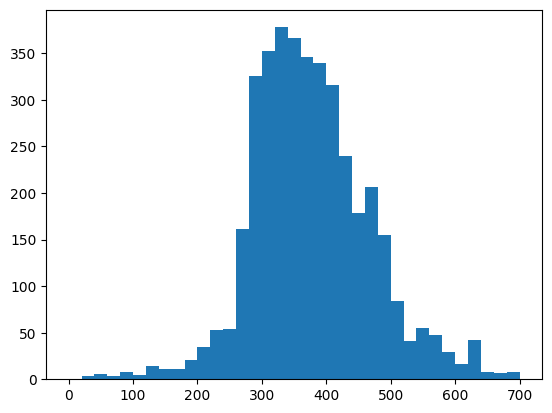

In [18]:
counts, bins = np.histogram(fuel_econ_data['co2'], range=(0, 700), bins=35)

plt.stairs(counts, bins, fill=True)

plt.show()

# City Fuel Economy (mpg)

A Histogram showing the fuel economy distribution of different models when driving in the city.

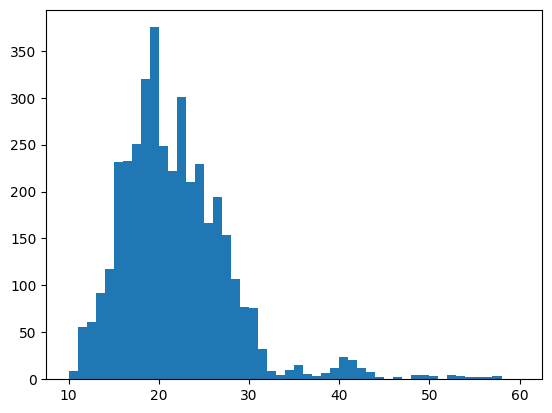

In [19]:
counts, bins = np.histogram(fuel_econ_data['city'], range=(10, 60), bins=50)

plt.stairs(counts, bins, fill=True)

plt.show()

# Highway Fuel Economy (mpg)

A histogram showng the fuel economy distribution when driving in highways.

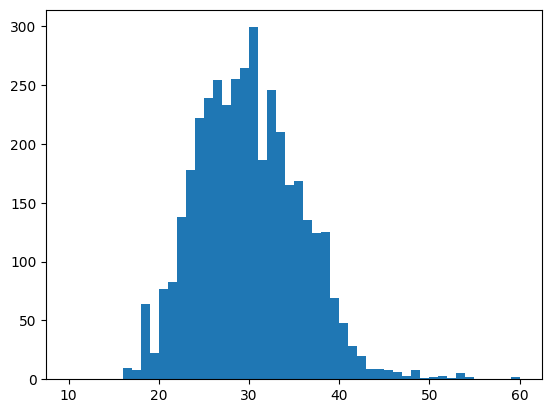

In [20]:
counts, bins = np.histogram(fuel_econ_data['highway'], range=(10, 60), bins=50)

plt.stairs(counts, bins, fill=True)

plt.show()

# Column Correlation Heatmap

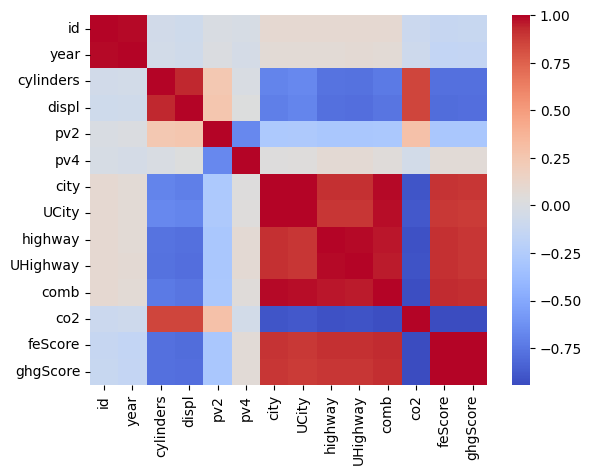

In [ ]:
cols = ['id', 'year', 'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway', 'UHighway', 'comb', 'co2', 'feScore', 'ghgScore']

fuel_econ_corr = fuel_econ_data[cols].corr()

sns.heatmap(fuel_econ_corr, cmap='coolwarm')

# Interpretation of Heat Map
The heat map shows the correlation between different dataset features.

Features with a blue color have a strong negative correlation. This means
that as the value of one variable increases, the other tends to
decrease and vice versa. An example of features which such a
relationship are the city and co2 variables. The city feature
represents a car's miles per gallon when driving in the city. The co2
represents the carbon dioxide emissions by a car. A car with a low mpg
uses more fuel to travel a distance and therefore emits more co2.
Such a car will have a high co2 number.

Features with a slight blue represent a weak negative correlation.

Features with a red colour represent a strong positive correlation.
For these features, as one increases, the other also increases.
An example of such a relationship is the one between city and highway
features. Both these features represent the fuel economies of cars in
miles per gallon. The city feature represents the fuel economy when
driving in the city. The highway feature represents the fuel economy
when driving in the highway. A car that's efficient in the city also tends
to be efficient on the highway as well. Therefore there is a strong positive
correlation between the highway and city features.

Features with a slight red represent a weak positive correlation.

Features with white show no correlation. This means one feature does
not influence the other. For example the pv4 and displ features show
no correlation with each other.

# Columns to drop

Given the target is ghgScore, we would need to drop columns that have no correlation with the ghgScore. From the heatmap, we can see that the pv4 has no correlation. Additionally, we can drop the id and year columns because their correlations are weak.